![](StrokePrediction.jpeg)

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_validate, validation_curve
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from sklearn import tree

import graphviz

from xgboost import XGBClassifier

import optuna

from scipy import stats
from scipy.stats import kurtosis, skew

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from time import time

import shap

from warnings import simplefilter
simplefilter("ignore")

In [6]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [25]:
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns.')

The dataset has 5110 rows and 12 columns.


In [27]:
print(f'The dataset has {data.isna().sum().sum()} null values.')

The dataset has 201 null values.


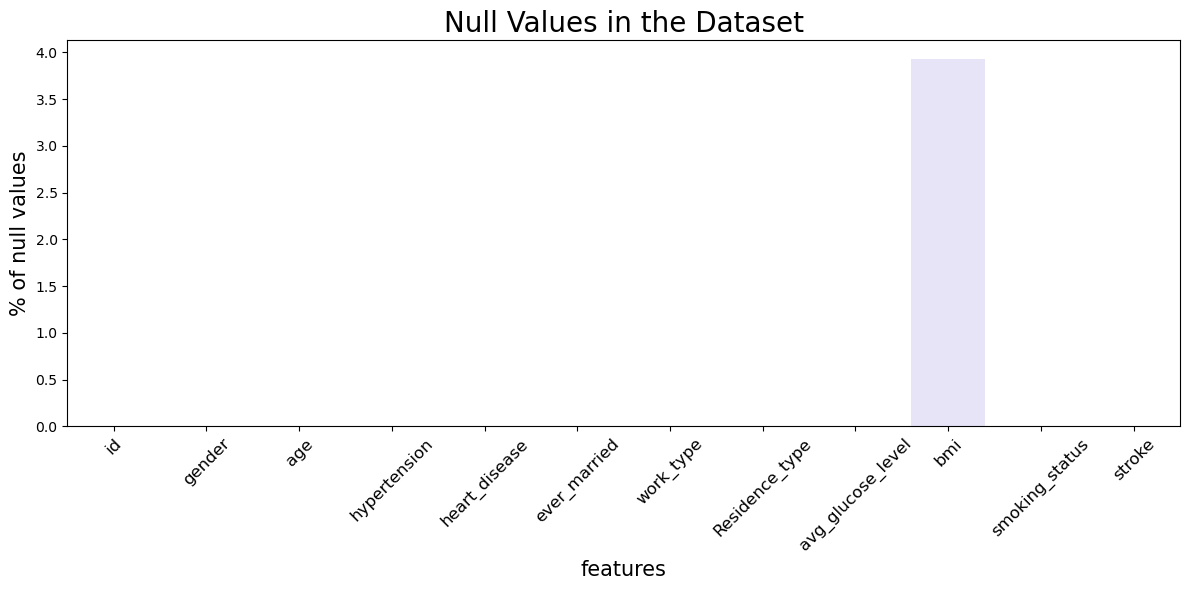

In [29]:
def plot_nulls(data, title, x_axis_label, y_axis_label):
    
    # number of nulls for each column
    data_nulls = (data.apply(lambda x: x.isnull().value_counts()).T[True]/len(data)*100).reset_index(name='count')

    plt.figure(figsize=(12,6))
    sns.barplot(data_nulls, x="index", y="count", alpha=0.3)
    
    plt.title(title, fontsize=20)
    plt.xlabel(x_axis_label, fontsize=15)
    plt.xticks(rotation=45, fontsize=12)
    plt.ylabel(y_axis_label, fontsize=15)
    
    plt.tight_layout()
    plt.show()
    
plot_nulls(data,"Null Values in the Dataset", 'features', '% of null values')  